In [17]:
import matplotlib.pyplot as plt

In [18]:
import pandas as pd

In [19]:
import seaborn as sns

In [20]:
df=pd.read_csv("supermarket.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [22]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

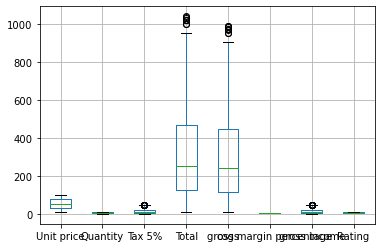

In [23]:
df.boxplot()

In [24]:
cols=['Tax 5%', 'Total', 'gross margin percentage','Payment']

In [25]:
Q1 = df[cols].quantile(0.25)

In [26]:
Q3 = df[cols].quantile(0.75)

In [27]:
IQR = Q3 - Q1

In [28]:
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-28-bd280828edfd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-28-bd280828edfd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

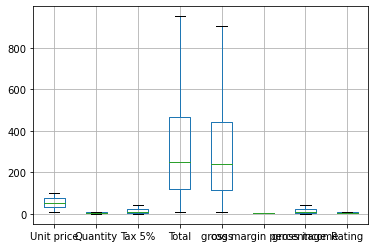

In [29]:
df.boxplot()

In [30]:
df["Total"].value_counts()

217.6335    2
263.9700    2
189.0945    2
175.9170    2
216.8460    2
           ..
570.7800    1
796.9080    1
597.6285    1
702.2190    1
54.0435     1
Name: Total, Length: 981, dtype: int64

Text(0.5, 1.0, 'Grouped by Total')

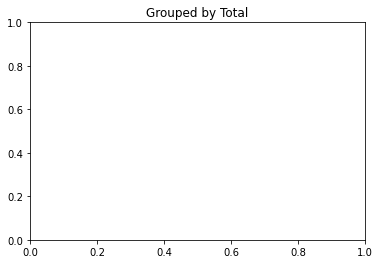

In [31]:
plt.title('Grouped by Total')

<AxesSubplot:xlabel='Total', ylabel='count'>

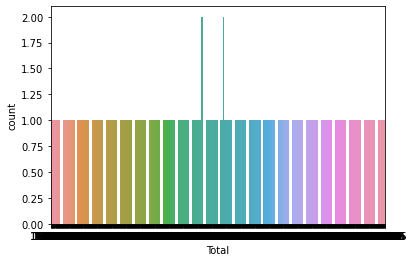

In [33]:
sns.countplot(x="Total",data=df)

In [34]:
df["Payment"].value_counts()

Cash           342
Ewallet        342
Credit card    307
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Grouped by Payment')

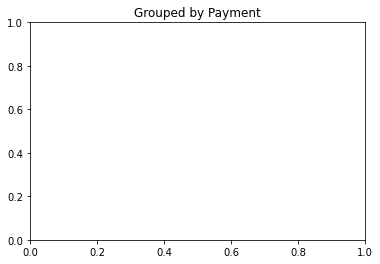

In [35]:
plt.title('Grouped by Payment')

<AxesSubplot:xlabel='Payment', ylabel='count'>

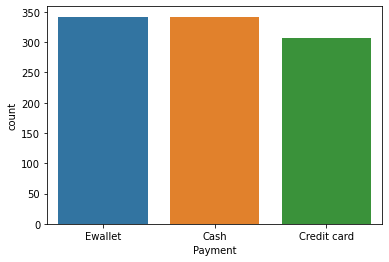

In [36]:
sns.countplot(x="Payment",data=df)

In [37]:
df["City"].value_counts()

Yangon       339
Mandalay     330
Naypyitaw    322
Name: City, dtype: int64

Text(0.5, 1.0, 'Grouped by City')

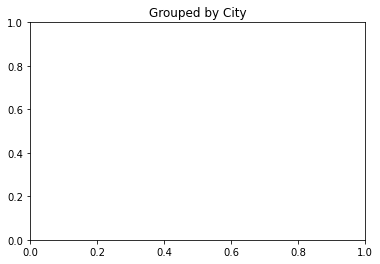

In [38]:
plt.title('Grouped by City')

<AxesSubplot:xlabel='City', ylabel='count'>

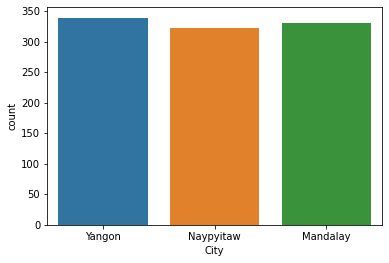

In [39]:
sns.countplot(x="City",data=df)

In [40]:
df["Product line"].value_counts()

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: Product line, dtype: int64

Text(0.5, 1.0, 'Grouped by Product line')

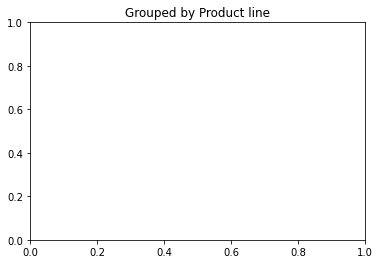

In [41]:
plt.title('Grouped by Product line')

<AxesSubplot:xlabel='Product line', ylabel='count'>

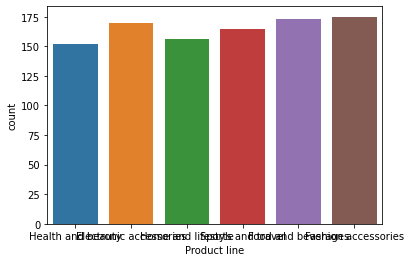

In [42]:
sns.countplot(x="Product line",data=df)

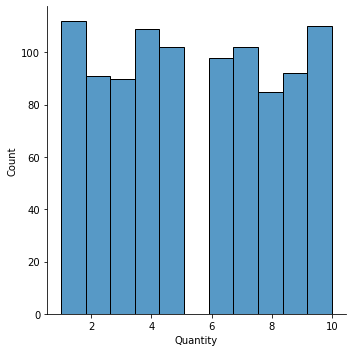

In [43]:
sns.displot(df["Quantity"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

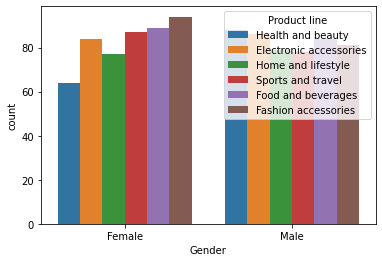

In [44]:
sns.countplot(x="Gender",hue="Product line",data=df)

<AxesSubplot:xlabel='Total', ylabel='count'>

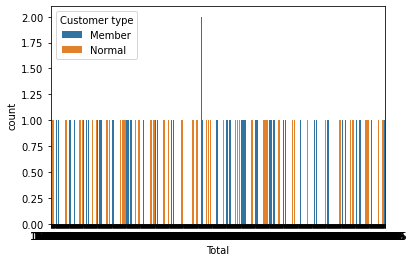

In [45]:
sns.countplot(x="Total",hue="Customer type",data=df)

In [46]:
pd.crosstab(df["Total"],df["Payment"])

Payment,Cash,Credit card,Ewallet
Total,,,
10.6785,1,0,0
12.6945,0,1,0
13.1670,1,0,0
13.4190,0,0,1
14.6790,0,0,1
...,...,...,...
942.9000,0,1,0
943.2990,1,0,0
944.6220,0,1,0


In [47]:
pd.crosstab(df["Quantity"],df["City"])

City,Mandalay,Naypyitaw,Yangon
Quantity,,,
1,32,44,36
2,33,30,28
3,36,20,34
4,39,33,37
5,28,30,44
6,36,31,31
7,28,38,36
8,30,30,25
9,34,27,31


In [48]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,NaN,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,NaN,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Total,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,NaN,-0.026092,1.000000


<AxesSubplot:>

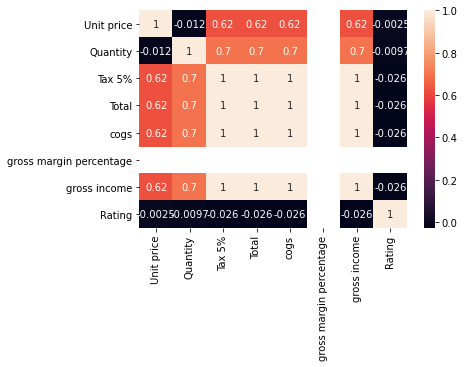

In [49]:
sns.heatmap(df.corr(),annot=True)